In [1]:
#Import Libraries dulu
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset = pd.read_csv('/content/drive/My Drive/winequality-white.csv', delimiter=';')

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#Kita cari data null
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
dataset.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [7]:
#Kita bagi data menjadi 2
#quality 3,4,5 -> Bad(0)
#quality 6,7,8 -> Good (1)

dataset['quality'].dtypes

dtype('int64')

In [8]:
dataset[['quality']] = dataset['quality'].apply(lambda x : (x - x) if int(x) < 6 else ((x - x) + 1))

In [9]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [10]:
X = dataset.drop('quality', axis = 1) #Kita pisahkan label quality dari feature
y = dataset['quality']

In [11]:
# #Kita scaling dataset karna beberapa values dari feature jomplang bedanya dengan feature lain
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X = scaler.fit_transform(X.values)
# y = scaler.fit_transform(y.values.reshape(-1,1)).flatten()

In [12]:
#Splitting dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [13]:
#Kita lihat korelasi dulu
corr = dataset.corr()

corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.089749
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.225440
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.000700
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.092756
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.183939
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,-0.001278
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.170924
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.268696
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.083687
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.051858


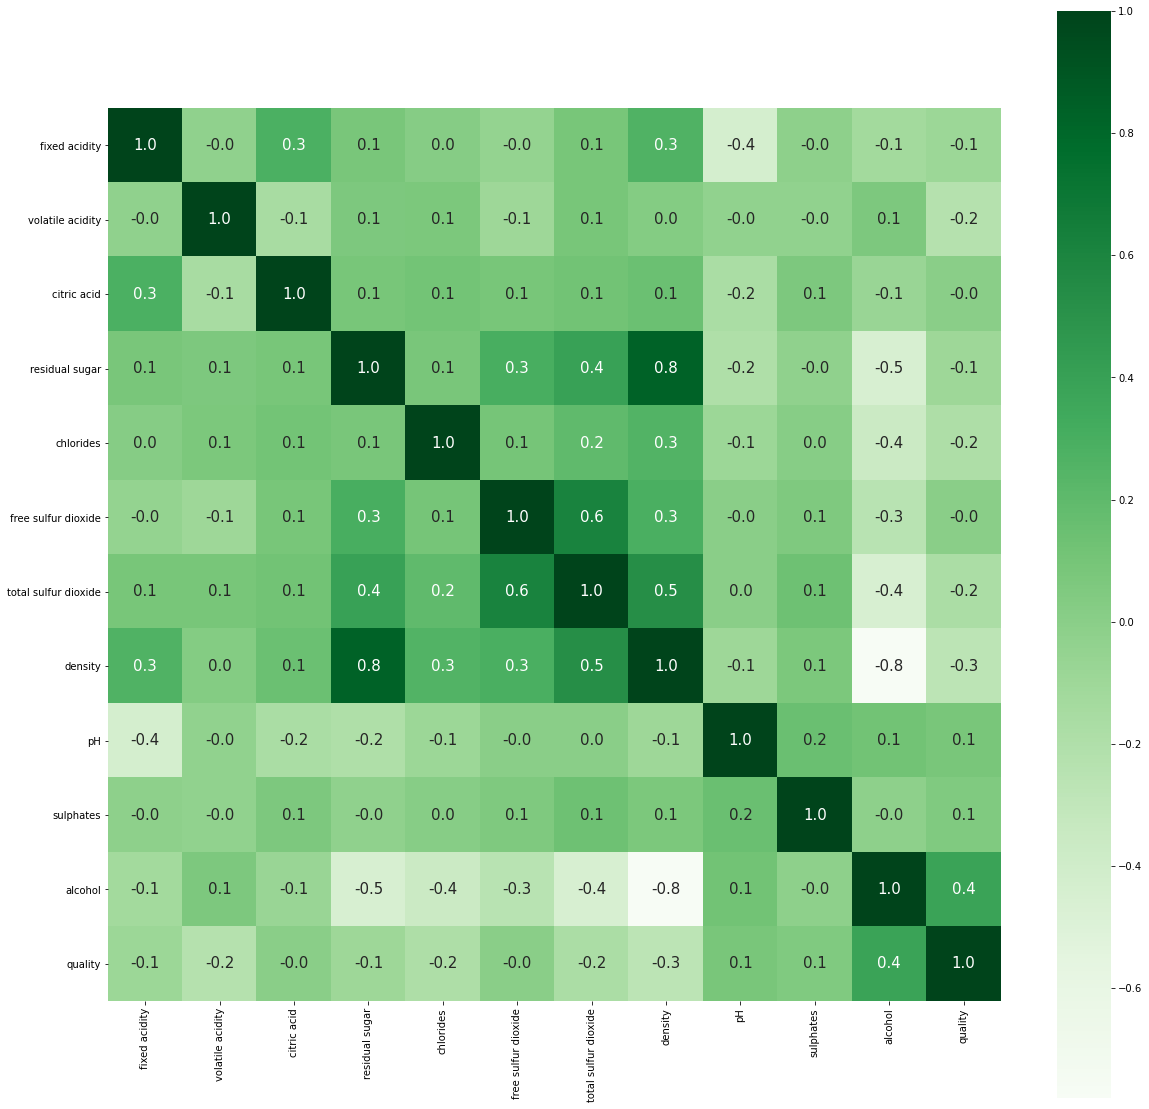

In [14]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [15]:
#Kita buat model sederhana
from keras.optimizers import Adamax

model = Sequential()
model.add(Dense(32, input_dim=11 , activation= 'relu' )) #input dim 11 karna feature kita 11
model.add(Dense(64,  activation= 'relu' ))
model.add(Dense(128,  activation= 'relu' ))
model.add(Dense(384,  activation= 'relu' ))


model.add(Dense(1,  activation= 'sigmoid' ))

opt = Adamax(learning_rate=0.001) #Pakai optimizer adam karena paling banyak digunakan dan hasilnya lumayan bagus

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 384)               49536     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 385       
Total params: 60,737
Trainable params: 60,737
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Fit the model
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=100, batch_size=12, verbose=2)

Epoch 1/100
327/327 - 1s - loss: 0.6866 - accuracy: 0.6388 - val_loss: 0.5682 - val_accuracy: 0.6949
Epoch 2/100
327/327 - 0s - loss: 0.6254 - accuracy: 0.6626 - val_loss: 0.5851 - val_accuracy: 0.6857
Epoch 3/100
327/327 - 0s - loss: 0.6044 - accuracy: 0.6687 - val_loss: 0.5750 - val_accuracy: 0.6857
Epoch 4/100
327/327 - 0s - loss: 0.5948 - accuracy: 0.6751 - val_loss: 0.5566 - val_accuracy: 0.6949
Epoch 5/100
327/327 - 0s - loss: 0.5793 - accuracy: 0.6771 - val_loss: 0.5453 - val_accuracy: 0.6898
Epoch 6/100
327/327 - 0s - loss: 0.5713 - accuracy: 0.6858 - val_loss: 0.5542 - val_accuracy: 0.6888
Epoch 7/100
327/327 - 0s - loss: 0.5680 - accuracy: 0.6802 - val_loss: 0.5493 - val_accuracy: 0.6929
Epoch 8/100
327/327 - 0s - loss: 0.5623 - accuracy: 0.6879 - val_loss: 0.5676 - val_accuracy: 0.6806
Epoch 9/100
327/327 - 0s - loss: 0.5572 - accuracy: 0.6968 - val_loss: 0.5542 - val_accuracy: 0.6867
Epoch 10/100
327/327 - 0s - loss: 0.5605 - accuracy: 0.6873 - val_loss: 0.5474 - val_accura

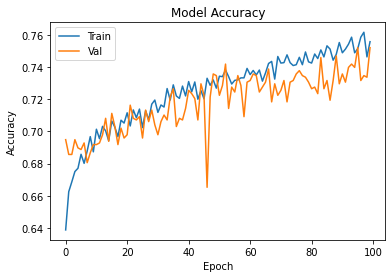

In [17]:
#Visualize the models accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

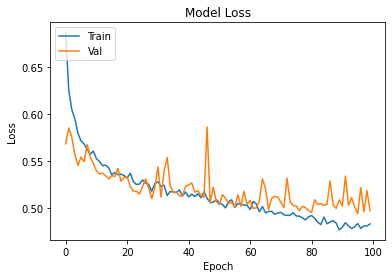

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [19]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.483616,0.751404,0.494009,0.752041,95
80,0.492084,0.742471,0.495508,0.726531,80
97,0.481145,0.761613,0.495980,0.734694,97
76,0.491470,0.746044,0.497371,0.737755,76
99,0.483216,0.755743,0.497439,0.752041,99
...,...,...,...,...,...
7,0.562307,0.687851,0.567637,0.680612,7
0,0.686618,0.638846,0.568176,0.694898,0
2,0.604444,0.668709,0.575003,0.685714,2
1,0.625360,0.662583,0.585082,0.685714,1


In [20]:
#Evaluasi model
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

31/31 [==============================] - 0s 1ms/step - loss: 0.4974 - accuracy: 0.7520
accuracy: 75.20%


# Kesimpulan
Hasil terbaik diperoleh pada epoch ke-95 dengan val_loss 0.4940 dan val_akurasi sebesar 75.2%, 2 % lebih besar dari percobaan sebelumnya. Hasil tersebut diperoleh menggunakan model deeper. Dilihat dari plot grafik loss & val_loss vs epoch, model ini tidak cenderung overfitting